In [1]:
import pandas as pd
dataset = 'uci'
type_simclr='simcrl_linear'
# experiment_name = 'convtae_kuhar_old'
data = pd.read_csv(f'experiments/simclr_all/{type_simclr}/{dataset}/{type_simclr}_3T_{dataset}_P100/data.csv')
data.loc[data['score'] < 0,'score'] = 0

In [2]:
data

,Unnamed: 0,score,randomforest-100-accuracy (mean),randomforest-100-accuracy (std),randomforest-100-f1-score macro (mean),randomforest-100-f1-score macro (std),randomforest-100-f1-score weighted (mean),randomforest-100-f1-score weighted (std),KNN-5-accuracy (mean),KNN-5-accuracy (std),...,node_ip,time_since_restore,iterations_since_restore,checkpoint_dir_name,config/min_delta,config/temperature_head,config/latent_dim,config/batch_size,config/transform_funcs,logdir
0,0,0.802941,0.792647,0.008028,0.791088,0.008102,0.791088,0.008102,0.802941,0.0,...,172.17.0.2,15.602645,1,NaN,0.003,1.2,89,308,"(4, 8, 9)",596a2096
1,1,0.861765,0.848235,0.003990,0.847660,0.004034,0.847660,0.004034,0.861765,0.0,...,172.17.0.2,23.371111,1,NaN,0.261,1.1,270,182,"(5, 7, 11)",a8032eff
2,2,0.844118,0.839118,0.006176,0.837663,0.006287,0.837663,0.006287,0.844118,0.0,...,172.17.0.2,26.492178,1,NaN,0.708,1.2,343,161,"(0, 1, 7)",4c2f21f5
3,3,0.847647,0.847647,0.004518,0.846919,0.004559,0.846919,0.004559,0.835294,0.0,...,172.17.0.2,21.551676,1,NaN,0.864,0.6,189,156,"(0, 10, 11)",2ed2ae79
4,4,0.823529,0.816471,0.006603,0.815471,0.006662,0.815471,0.006662,0.823529,0.0,...,172.17.0.2,25.563092,1,NaN,0.553,1.0,306,221,"(0, 3, 9)",dacbd420
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
996,996,0.841176,0.834706,0.007759,0.833960,0.007875,0.833960,0.007875,0.841176,0.0,...,172.17.0.2,24.861496,1,NaN,0.680,1.7,276,232,"(0, 4, 10)",4af5bc61
997,997,0.847059,0.836176,0.003957,0.835346,0.004052,0.835346,0.004052,0.847059,0.0,...,172.17.0.2,26.098132,1,NaN,0.441,1.8,298,169,"(1, 8, 10)",20257123
998,998,0.841176,0.839118,0.007210,0.837923,0.007293,0.837923,0.007293,0.841176,0.0,...,172.17.0.2,24.989412,1,NaN,0.117,1.9,290,164,"(4, 7, 11)",50bed5d6
999,999,0.850000,0.837941,0.004641,0.836223,0.004864,0.836223,0.004864,0.850000,0.0,...,172.17.0.2,27.841480,1,NaN,0.467,2.0,341,143,"(3, 9, 11)",4ae95475


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml

In [4]:
with open(f'TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
    score = yaml.load(f, Loader=yaml.FullLoader)
    score = score['score']
    print(score)

0.8470588235294118


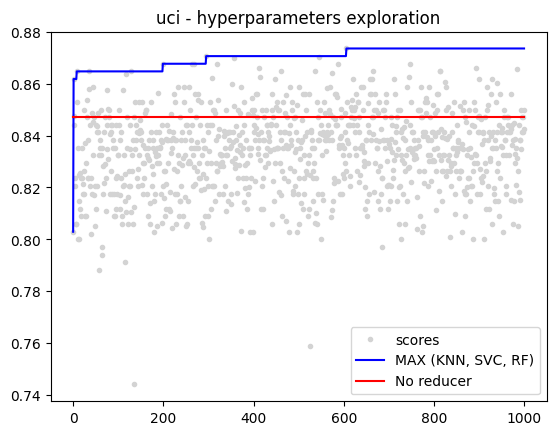

In [5]:
# Plot all data points
plt.title(f'{dataset} - hyperparameters exploration')
plt.plot(data['Unnamed: 0'], data['score'], '.', color='lightgray', label='scores')
plt.plot(data['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
plt.plot(data['Unnamed: 0'], [score]*len(data), color='red', label='No reducer')
plt.legend()

In [6]:

    

def get_perc(dataset,percentage,plot_per,indice_plot,transf):
    try:
        data = pd.read_csv(f'experiments/simclr_all/{type_simclr}/{dataset}/{type_simclr}_{transf}_{dataset}_P{percentage}/data.csv')

       # data = pd.read_csv(f'../experiments/umap_{dataset}_p25/data.csv')
        data = data.loc[data['score'] > 0]
    except:
        data = pd.DataFrame({'Unnamed: 0': [], 'score': []})
    if(plot_per):
        axs[indice_plot].set_title(f'Up to {percentage}% of orig. dim.')
        axs[indice_plot].plot(data['Unnamed: 0'], data['score'], '.', color='lightgray', label='scores')
        axs[indice_plot].plot(data['score'].cummax(), color='blue', label='MAX (KNN, SVC, RF)')
        axs[indice_plot].plot(data['Unnamed: 0'], [score]*len(data), color='red', label='No reducer')
        axs[indice_plot].legend(loc='lower center')
        axs[indice_plot].set_ylabel(f'Best accuracy on {dataset}_{transf}')
        axs[0].grid()
        
        
    
    

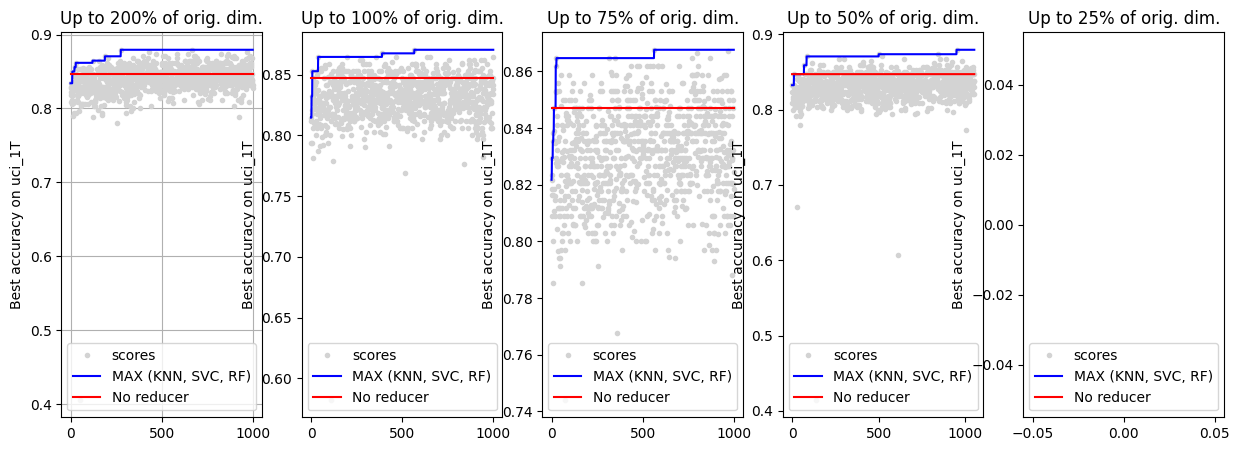

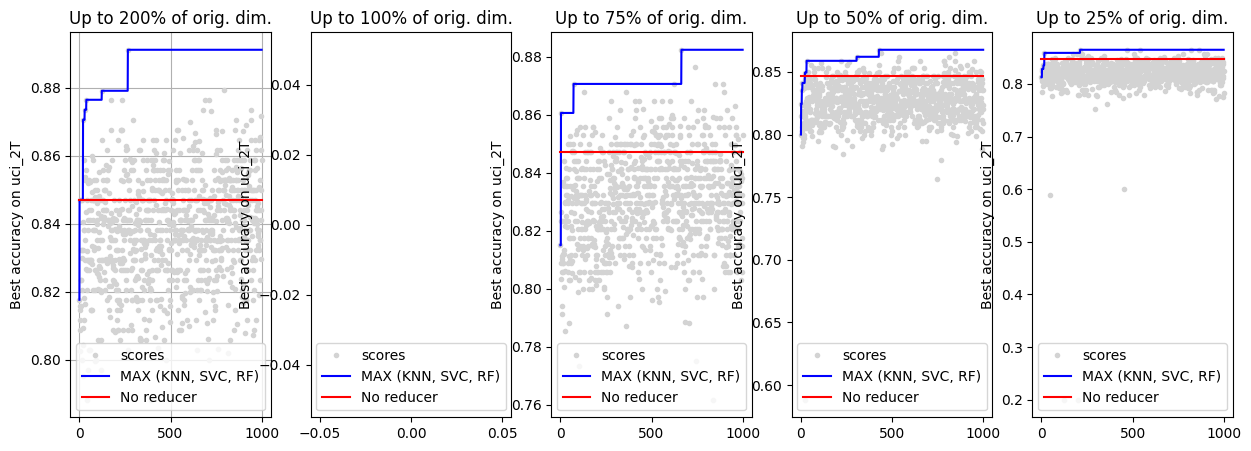

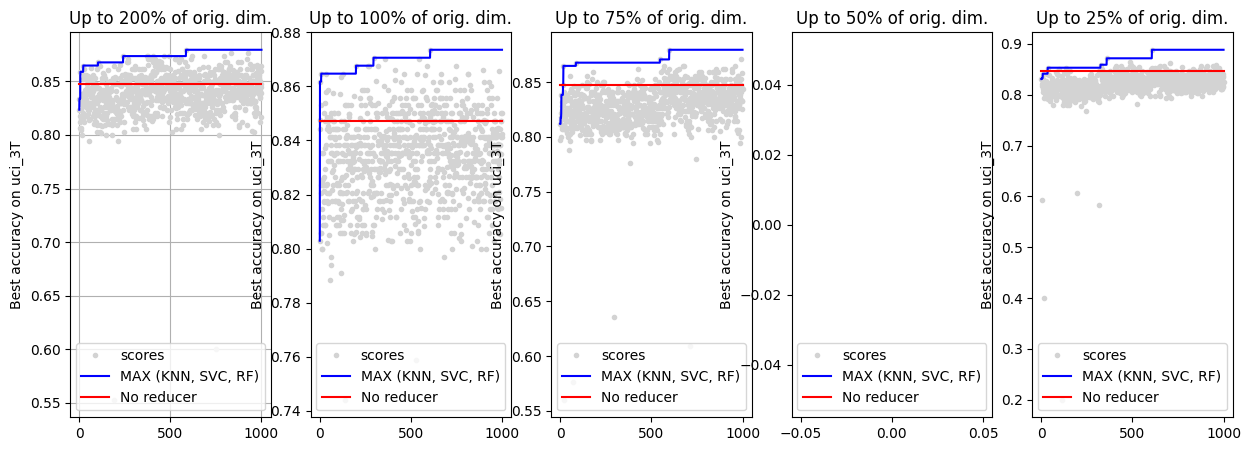

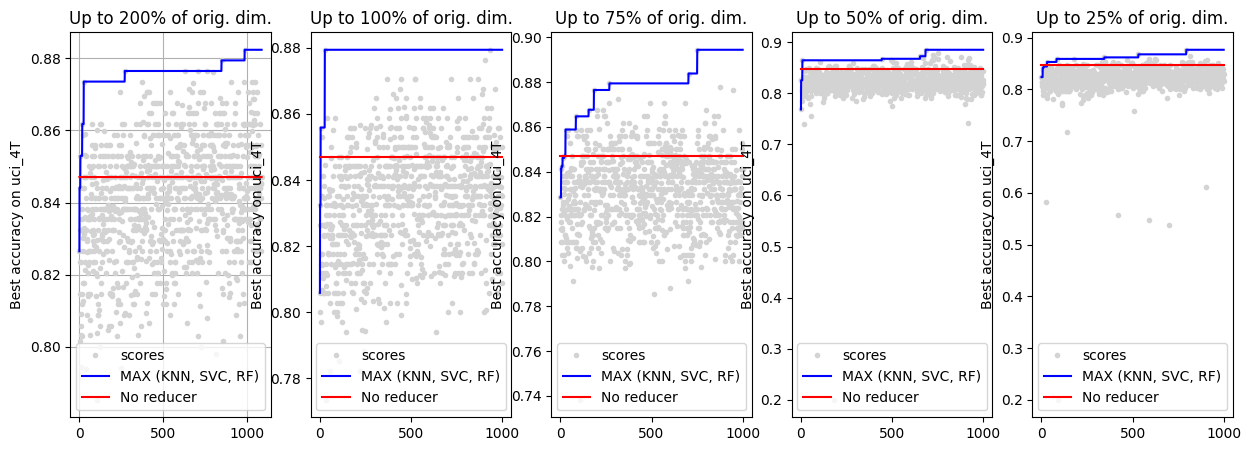

In [7]:
transformations=['1T','2T','3T','4T']
percentages=['200','100','75','50','25']
plot_per=True
for i, transf in enumerate(transformations):
    fig, axs = plt.subplots(1, 5, figsize=(15, 5))

    # Subplots for each dataset
    for j, percentage in enumerate(percentages):
        get_perc(dataset,percentage,plot_per,j,transf)
        
    

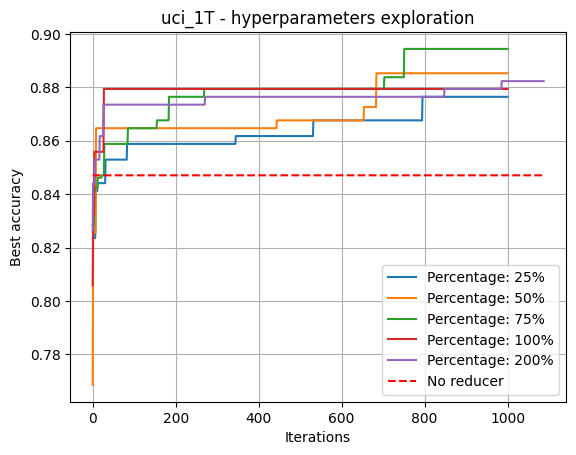

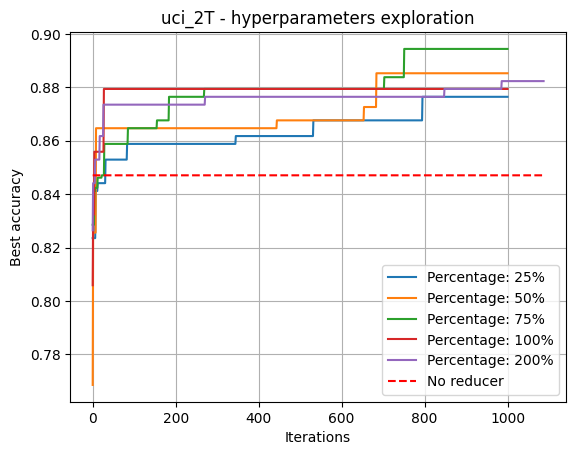

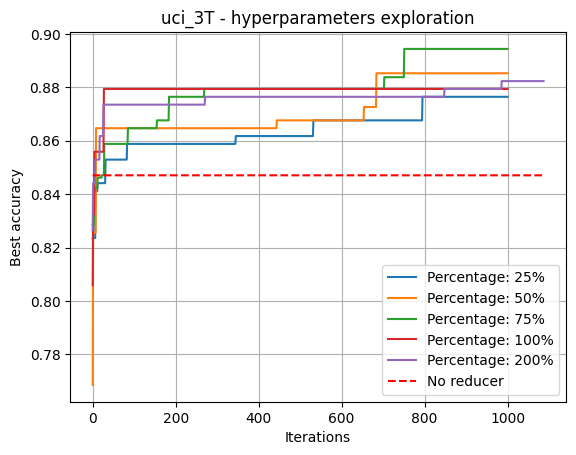

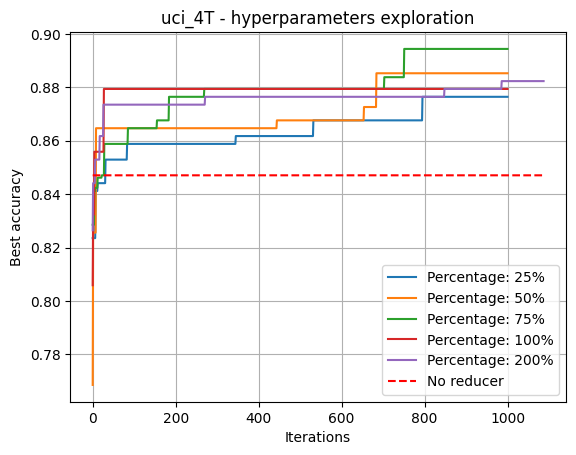

In [8]:
#datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
# datasets = ['kuhar', 'motionsense', 'realworld_thigh', 'realworld_waist']
transformations=['1T','2T','3T','4T']

colors = ['green', 'blue', 'orange', 'gray', 'purple', 'brown']
percentages = [25, 50, 75, 100, 200]

for i, transformation in enumerate(transformations):
    best_scores = []
    for p in percentages:
        try:
            data = pd.read_csv(f'experiments/simclr_all/{type_simclr}/{dataset}/{type_simclr}_{transf}_{dataset}_P{p}/data.csv')

            data = data.loc[data['score'] > 0]
        except:
            data = pd.DataFrame({'Unnamed: 0': [], 'score': []})
        best_scores.append(data['score'].max())
        plt.plot(data['score'].cummax(), label=f'Percentage: {p}%')
    
    with open(f'TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score_no_reducer = yaml.load(f, Loader=yaml.FullLoader)
        score_no_reducer = score_no_reducer['score']
        plt.plot(data['Unnamed: 0'], [score_no_reducer]*len(data['Unnamed: 0']), '--',color='red', label='No reducer')
    plt.title(f'{dataset}_{transformation} - hyperparameters exploration')
    plt.ylabel('Best accuracy')
    plt.xlabel('Iterations')
    plt.legend()
    plt.grid()
    plt.show()

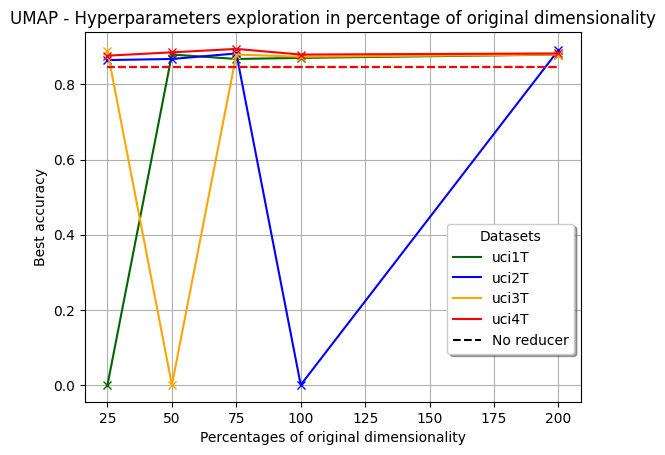

In [9]:
#datasets = ['kuhar', 'motionsense', 'uci', 'wisdm', 'realworld_thigh', 'realworld_waist']
# datasets = ['kuhar', 'motionsense', 'realworld_thigh', 'realworld_waist']
colors = ['darkgreen', 'blue', 'orange', 'red', 'lightgreen', 'brown']
percentages = [25, 50, 75, 100, 200]
transformations=['1T','2T','3T','4T']
for i, transformation in enumerate(transformations):
    best_scores = []
    for p in percentages:
        try:
            data = pd.read_csv(f'experiments/simclr_all/{type_simclr}/{dataset}/{type_simclr}_{transformation}_{dataset}_P{p}/data.csv')
            data = data.loc[data['score'] > 0]
            best_scores.append(data['score'].max())
        except:
            best_scores.append(0)
    plt.plot(percentages, best_scores, 'x', color=colors[i])
    plt.plot(percentages, best_scores, '-', label=f'{dataset}{transformation}', color=colors[i])
    
    with open(f'TV_sb_no_reducer/scores/no_reducer_{dataset}.yaml') as f:
        score_no_reducer = yaml.load(f, Loader=yaml.FullLoader)
        score_no_reducer = score_no_reducer['score']
    plt.plot(percentages, [score_no_reducer]*len(percentages), '--', color=colors[i])
plt.plot(np.NaN, np.NaN, '--', color=[0, 0, 0], label='No reducer' )

plt.title(f'UMAP - Hyperparameters exploration in percentage of original dimensionality')
plt.ylabel('Best accuracy')
plt.xlabel('Percentages of original dimensionality')
plt.legend(bbox_to_anchor=(1.0, 0.5), fancybox=True, shadow=True, ncol=1, title='Datasets')
plt.grid()
plt.show()
    